# Exercise 7, Sample solution

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 4)

## Task 1

In [2]:
import sys
sys.path.append('/Users/plesser/NEST/code/releases/nest-2.6.0/ins/lib/python2.7/site-packages/')

In [3]:
import nest

In [4]:
def build_network(Ie):
    nest.ResetKernel()
    
    n = nest.Create('iaf_psc_delta', params={'I_e': Ie})
    vm = nest.Create('voltmeter', params={'interval': 0.1})
    sd = nest.Create('spike_detector')
    
    nest.Connect(vm, n)
    nest.Connect(n, sd)
    
    return vm, sd    

### Exploration 1

In [5]:
vm, sd = build_network(1000.)
nest.Simulate(50)

In [6]:
vme = nest.GetStatus(vm, 'events')[0]
V, t = vme['V_m'], vme['times']

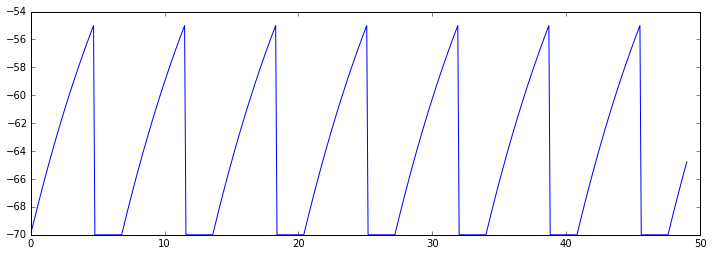

In [8]:
plt.plot(t, V);

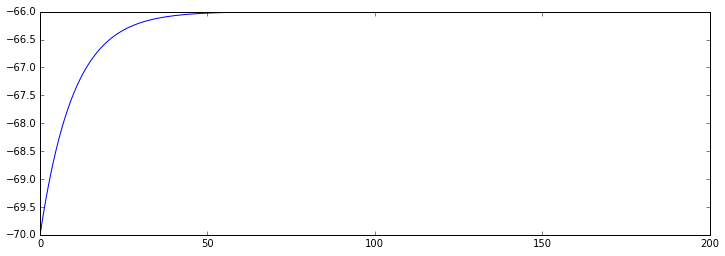

In [9]:
vm, sd = build_network(100.)
nest.Simulate(200)
vme = nest.GetStatus(vm, 'events')[0]
V, t = vme['V_m'], vme['times']
plt.plot(t, V);

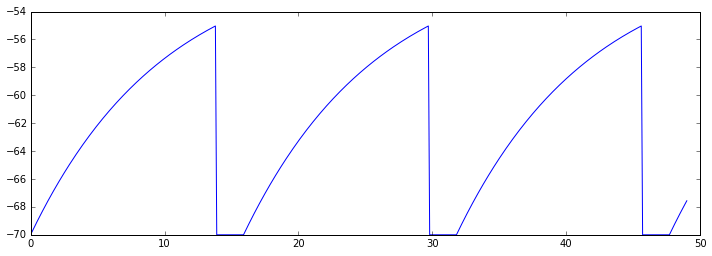

In [10]:
vm, sd = build_network(500.)
nest.Simulate(50)
vme = nest.GetStatus(vm, 'events')[0]
V, t = vme['V_m'], vme['times']
plt.plot(t, V);

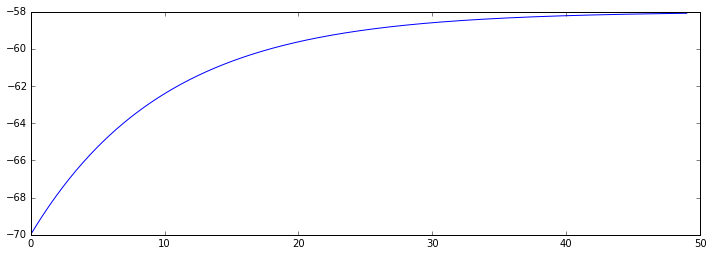

In [10]:
vm, sd = build_network(300.)
nest.Simulate(50)
vme = nest.GetStatus(vm, 'events')[0]
V, t = vme['V_m'], vme['times']
plt.plot(t, V);

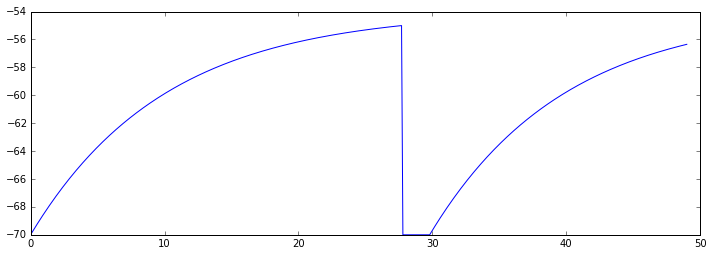

In [11]:
vm, sd = build_network(400.)
nest.Simulate(50)
vme = nest.GetStatus(vm, 'events')[0]
V, t = vme['V_m'], vme['times']
plt.plot(t, V);

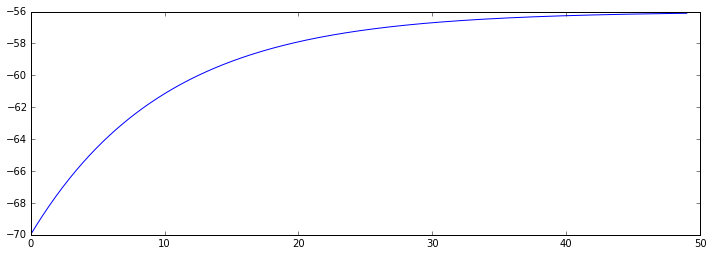

In [12]:
vm, sd = build_network(350.)
nest.Simulate(50)
vme = nest.GetStatus(vm, 'events')[0]
V, t = vme['V_m'], vme['times']
plt.plot(t, V);

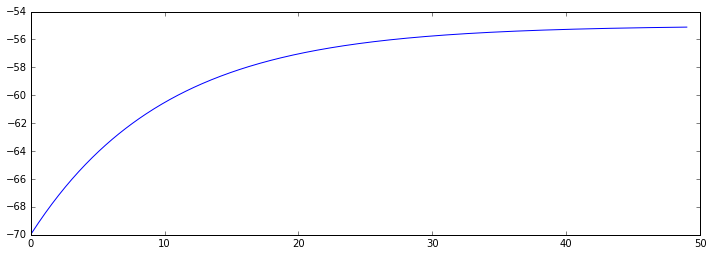

In [13]:
vm, sd = build_network(375.)
nest.Simulate(50)
vme = nest.GetStatus(vm, 'events')[0]
V, t = vme['V_m'], vme['times']
plt.plot(t, V);

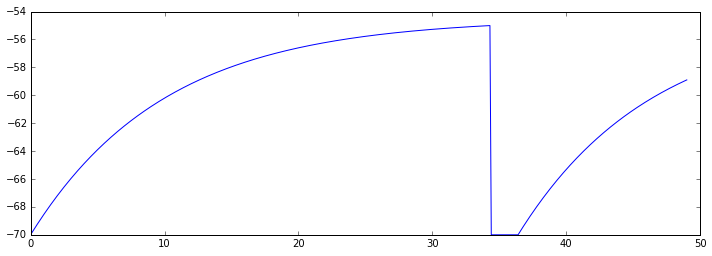

In [14]:
vm, sd = build_network(387.5)
nest.Simulate(50)
vme = nest.GetStatus(vm, 'events')[0]
V, t = vme['V_m'], vme['times']
plt.plot(t, V);

We have now found one value for which we find one spike within 50 ms. To find the smallest and largest $I_e$ evoking exactly one spike in 50 ms, starting with a "fresh" (non-refractory neuron), we first look compute the value of $I_e$ that yields $V(t^*)=V_{\textrm{th}}$ (note that $V_0=E_L$):

\begin{align}
V_{\textrm{th}} &=  E_L e^{-t*/\tau_m} +\left(E_L + \frac{I_e \tau_m}{C}\right)\left(1-e^{-t^*/\tau_m}\right)\\
&= E_L + \frac{I_e \tau_m}{C}\left(1-e^{-t^*/\tau_m}\right)\\
\Leftrightarrow \quad I_e &= \frac{C}{\tau_m}\frac{V_{\textrm{th}}-E_L}{1-e^{-t^*/\tau_m}}\\
&= \frac{250 \textrm{pA}}{10 \textrm{ms}}\frac{-55 \textrm{mV}-(-70 \textrm{mV})}{1-e^{-50\textrm{ms}/10\textrm{ms}}}
\end{align}

which we can evaluate in Python:

In [15]:
I1min = 250./10. * (-55. - -70.) / (1 - np.exp(-50./10.))
print I1min

377.54387059


When considering the other extreme, just not firing a second spike, we must take the refractory period of 2 ms into account: The first spike should be fired after 24.1 ms, followed by 2 ms refractory time, then another 24.1 ms until the second spike. We can thus use the same equation as above, just with $t^*=24.1$ ms:

In [16]:
I1max = 250./10. * (-55. - -70.) / (1 - np.exp(-24.1/10.))
print I1max

412.004286343


I1min spike times: [ 50.]
I1max spike times: [ 24.2  50.4]


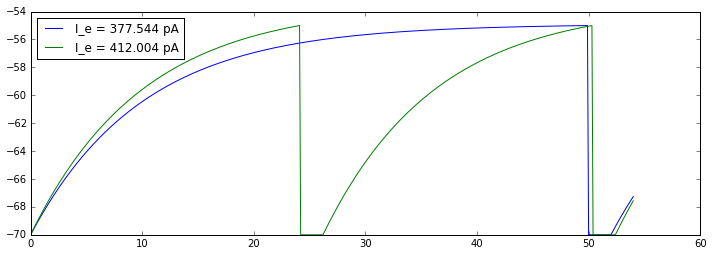

In [17]:
vm, sd = build_network(I1min)
nest.Simulate(55)
vme = nest.GetStatus(vm, 'events')[0]
V1min, t = vme['V_m'], vme['times']
print "I1min spike times:", nest.GetStatus(sd, 'events')[0]['times']

vm, sd = build_network(I1max)
nest.Simulate(55)
vme = nest.GetStatus(vm, 'events')[0]
V1max, t = vme['V_m'], vme['times']
print "I1max spike times:", nest.GetStatus(sd, 'events')[0]['times']

plt.plot(t, V1min, label="I_e = {:.3f} pA".format(I1min));
plt.plot(t, V1max, label="I_e = {:.3f} pA".format(I1max));
plt.legend(loc='best');

### Exploration 2

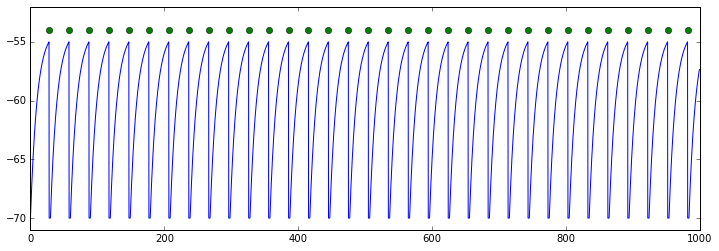

In [18]:
vm, sd = build_network(400.)
nest.Simulate(1000)
vme = nest.GetStatus(vm, 'events')[0]
V, t = vme['V_m'], vme['times']
t_spikes = nest.GetStatus(sd, 'events')[0]['times']
plt.plot(t, V);
plt.plot(t_spikes, -54. * np.ones_like(t_spikes), 'o');
plt.ylim(-71, -52);

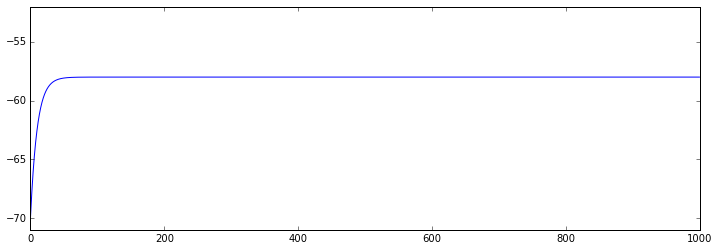

In [19]:
vm, sd = build_network(300.)
nest.Simulate(1000)
vme = nest.GetStatus(vm, 'events')[0]
V, t = vme['V_m'], vme['times']
t_spikes = nest.GetStatus(sd, 'events')[0]['times']
plt.plot(t, V);
plt.plot(t_spikes, -54. * np.ones_like(t_spikes), 'o');
plt.ylim(-71, -52);

In [20]:
a, b = 300., 400.
n_sp = 0
n_sp_wanted = 20

while n_sp != n_sp_wanted:
    I_e_opt = ( a + b ) / 2
    
    vm, sd = build_network(I_e_opt)
    nest.Simulate(1000)
    n_sp = len(nest.GetStatus(sd, 'events')[0]['times'])

    print I_e_opt, n_sp
    
    if n_sp < n_sp_wanted:
        a = I_e_opt
    else:
        b = I_e_opt

350.0 0
375.0 0
387.5 27
381.25 23
378.125 20


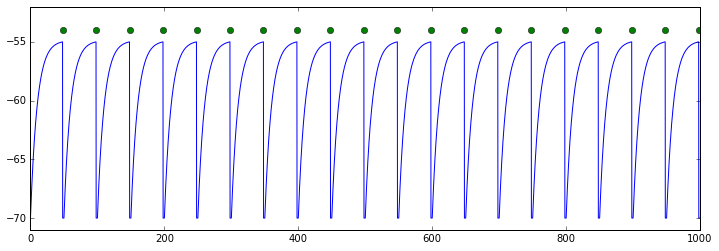

In [21]:
vm, sd = build_network(I_e_opt)
nest.Simulate(1000)
vme = nest.GetStatus(vm, 'events')[0]
V, t = vme['V_m'], vme['times']
t_spikes = nest.GetStatus(sd, 'events')[0]['times']
plt.plot(t, V);
plt.plot(t_spikes, -54. * np.ones_like(t_spikes), 'o');
plt.ylim(-71, -52);

### Exploration 3

In [22]:
vm, sd = build_network(375.05)
nest.Simulate(1000)
t_spikes = nest.GetStatus(sd, 'events')[0]['times']
isi = np.diff(t_spikes)
print isi.min(), isi.mean(), isi.max(), isi.max()-isi.min()

91.3 91.3 91.3 1.13686837722e-13


In [23]:
vm, sd = build_network(800.)
nest.Simulate(1000)
t_spikes = nest.GetStatus(sd, 'events')[0]['times']
isi = np.diff(t_spikes)
print isi.min(), isi.mean(), isi.max(), isi.max()-isi.min()

8.4 8.4 8.4 1.70530256582e-13


In [24]:
a, b = 375.05, 800.
isi_wanted = 20.

while True:
    
    I_opt_isi = ( a + b ) / 2
    
    vm, sd = build_network(I_opt_isi)
    nest.Simulate(1000)
    mean_isi = np.diff(nest.GetStatus(sd, 'events')[0]['times']).mean()

    print I_opt_isi, mean_isi
    
    if mean_isi == isi_wanted:
        break
        
    if mean_isi < isi_wanted:
        b = I_opt_isi
    else:
        a = I_opt_isi    

587.525 12.2
481.2875 17.2
428.16875 22.9
454.728125 19.5
441.4484375 21.0
448.08828125 20.2
451.408203125 19.8
449.748242188 20.0


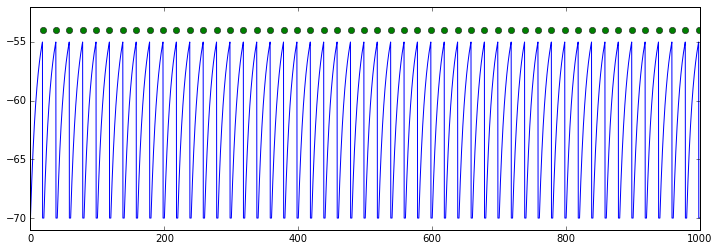

In [25]:
vm, sd = build_network(I_opt_isi)
nest.Simulate(1000)
vme = nest.GetStatus(vm, 'events')[0]
V, t = vme['V_m'], vme['times']
t_spikes = nest.GetStatus(sd, 'events')[0]['times']
plt.plot(t, V);
plt.plot(t_spikes, -54. * np.ones_like(t_spikes), 'o');
plt.ylim(-71, -52);

## Task 2

In [26]:
def build_network2(Ie, mu, sigma, my_seed):
    nest.ResetKernel()
    nest.SetKernelStatus({'grng_seed': my_seed, 'rng_seeds': [my_seed + 1]})

    n = nest.Create('iaf_psc_delta', params={'I_e': Ie})
    vm = nest.Create('voltmeter', params={'interval': 0.1})
    sd = nest.Create('spike_detector')
    ng = nest.Create('noise_generator', params={'mean': mu, 'std': sigma})
    
    nest.Connect(vm, n)
    nest.Connect(n, sd)
    nest.Connect(ng, n)
    
    return vm, sd    

### Validation

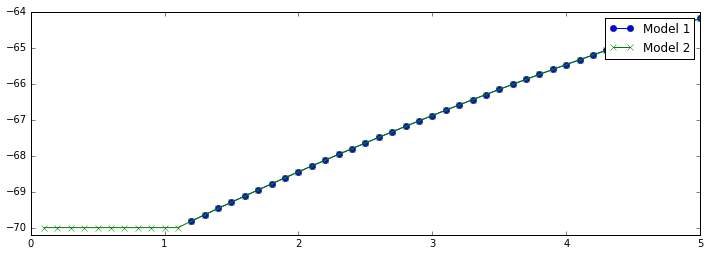

In [27]:
vm1, _ = build_network(I_opt_isi)
nest.Simulate(200.)
vme1 = nest.GetStatus(vm1, 'events')[0]
t1, v1 = vme1['times'], vme1['V_m']

vm2, _ = build_network2(0., I_opt_isi, 0., 1234)
nest.Simulate(200.)
vme2 = nest.GetStatus(vm2, 'events')[0]
t2, v2 = vme2['times'], vme2['V_m']

plt.plot(t1 + 1.1, v1, 'o-', label='Model 1')
plt.plot(t2, v2, 'x-', label='Model 2')
plt.legend()
plt.xlim(0, 5); 
plt.ylim(-70.2, -64.);

In [28]:
dv = v1[:-11] - v2[11:]
print dv.min(), dv.max()

0.0 0.0


### Exploration 1

In [29]:
vm, sd = build_network2(I_e_opt, 0., 20., 1234)
nest.Simulate(1000.)
vme = nest.GetStatus(vm, 'events')[0]
t, v_20 = vme['times'], vme['V_m']
t_sp_20 = nest.GetStatus(sd, 'events')[0]['times']

vm, sd = build_network2(I_e_opt, 0., 100., 1234)
nest.Simulate(1000.)
vme = nest.GetStatus(vm, 'events')[0]
t, v_100 = vme['times'], vme['V_m']
t_sp_100 = nest.GetStatus(sd, 'events')[0]['times']

vm, sd = build_network2(I_e_opt, 0., 200., 1234)
nest.Simulate(1000.)
vme = nest.GetStatus(vm, 'events')[0]
t, v_200 = vme['times'], vme['V_m']
t_sp_200 = nest.GetStatus(sd, 'events')[0]['times']

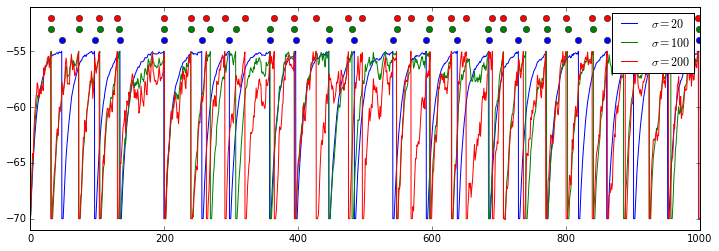

In [30]:
plt.plot(t, v_20, label=r'$\sigma = 20$')
plt.plot(t, v_100, label=r'$\sigma = 100$')
plt.plot(t, v_200, label=r'$\sigma = 200$')

plt.plot(t_sp_20, -54 * np.ones_like(t_sp_20), 'bo')
plt.plot(t_sp_100, -53 * np.ones_like(t_sp_100), 'go')
plt.plot(t_sp_200, -52 * np.ones_like(t_sp_200), 'ro')

plt.ylim(-71, -51)
plt.legend();

### Exploration 2

In [31]:
vm, sd = build_network2(I_e_opt, 0., 20., 1234)
nest.Simulate(100000.)
vme = nest.GetStatus(vm, 'events')[0]
t, v_20 = vme['times'], vme['V_m']
t_sp_20 = nest.GetStatus(sd, 'events')[0]['times']

vm, sd = build_network2(I_e_opt, 0., 100., 1234)
nest.Simulate(100000.)
vme = nest.GetStatus(vm, 'events')[0]
t, v_100 = vme['times'], vme['V_m']
t_sp_100 = nest.GetStatus(sd, 'events')[0]['times']

vm, sd = build_network2(I_e_opt, 0., 200., 1234)
nest.Simulate(100000.)
vme = nest.GetStatus(vm, 'events')[0]
t, v_200 = vme['times'], vme['V_m']
t_sp_200 = nest.GetStatus(sd, 'events')[0]['times']

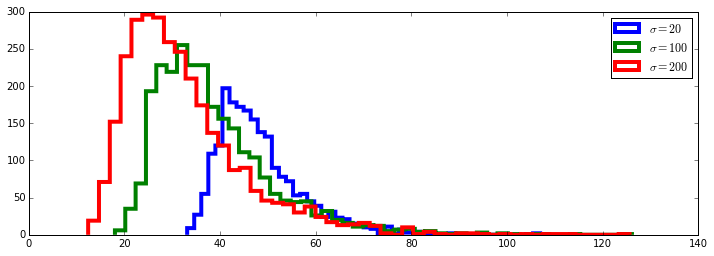

In [32]:
plt.hist(np.diff(t_sp_20), bins=50, histtype='step', alpha=1, lw=4, label=r'$\sigma = 20$');
plt.hist(np.diff(t_sp_100), bins=50, histtype='step', alpha=1, lw=4, label=r'$\sigma = 100$');
plt.hist(np.diff(t_sp_200), bins=50, histtype='step', alpha=1, lw=4, label=r'$\sigma = 200$');
plt.legend();

### Exploration 3

In [33]:
sigma = np.linspace(0, 500, 20)
rate = np.nan * np.zeros_like(sigma)
t_sim = 100000.

for idx, sig in enumerate(sigma):
    _, sd = build_network2(I_e_opt, 0., sig, 1234)
    nest.Simulate(t_sim)
    rate[idx] = nest.GetStatus(sd, 'n_events')[0] / t_sim * 1000.

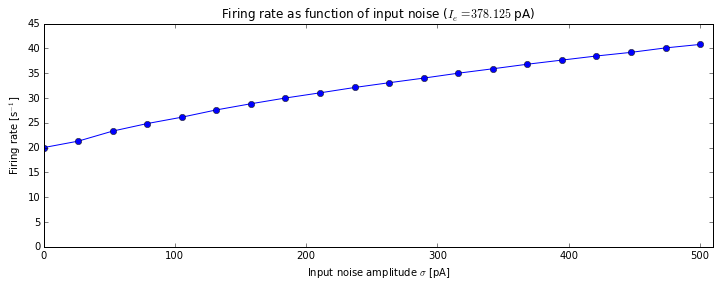

In [34]:
plt.plot(sigma, rate, 'o-')
plt.xlim(0, 510)
plt.ylim(0, 45)
plt.xlabel(r'Input noise amplitude $\sigma$ [pA]')
plt.ylabel(r'Firing rate [s$^{-1}$]')
plt.title('Firing rate as function of input noise ($I_e = {:.3f}$ pA)'.format(I_e_opt));

### Exploration 4

In [35]:
sigma = 200.
t_sim = 1000.
t_spikes = []

for idx in range(30):
    _, sd = build_network2(I_e_opt, 0., sigma, 1234 + 10 * idx)
    nest.Simulate(t_sim)
    t_spikes.append(nest.GetStatus(sd, 'events')[0]['times'])

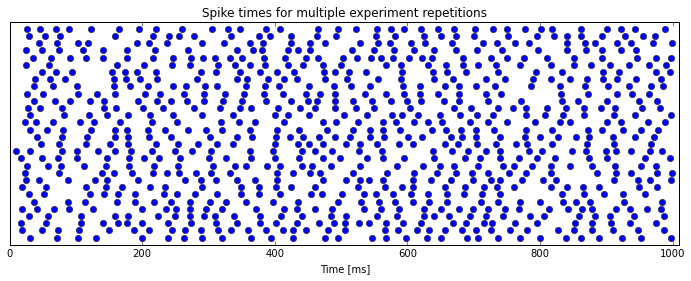

In [36]:
for idx, t_sp in enumerate(t_spikes):
    plt.plot(t_sp, idx * np.ones_like(t_sp), 'bo')
plt.xlim(0, 1010)
plt.ylim(-1, 30)
plt.yticks([])
plt.xlabel('Time [ms]')
plt.title('Spike times for multiple experiment repetitions');

## Task 3

In [37]:
def build_network3(ts, wd, we, wa, dd=1., de=1., da=1.):
    nest.ResetKernel()

    d = nest.Create('iaf_psc_delta')
    e = nest.Create('iaf_psc_exp')
    a = nest.Create('iaf_psc_alpha')
    nrns = d + e + a
    vms = nest.Create('voltmeter', n=3, params={'interval': 0.1})
    sds = nest.Create('spike_detector', n=3)
    sg = nest.Create('spike_generator', params={'spike_times': ts})
    
    nest.Connect(vms, nrns, 'one_to_one')
    nest.Connect(nrns, sds, 'one_to_one')
    nest.Connect(sg, d, syn_spec={'weight': wd, 'delay': dd})
    nest.Connect(sg, e, syn_spec={'weight': we, 'delay': de})
    nest.Connect(sg, a, syn_spec={'weight': wa, 'delay': da})
    
    return vms, sds

In [38]:
ts = [10., 20., 27., 30., 40., 44., 50., 58., 65., 70.]

### Exploration 1

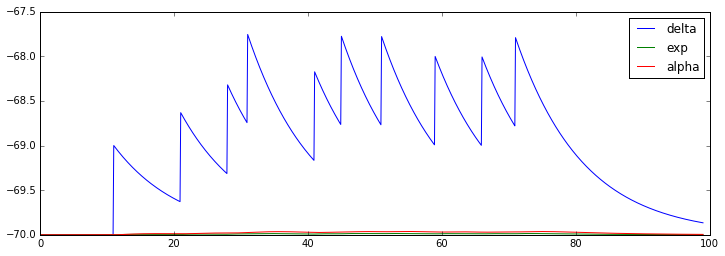

In [39]:
vms, _ = build_network3(ts, 1., 1., 1.)
nest.Simulate(100)

vm_stat = nest.GetStatus(vms, 'events')
t_Vm = vm_stat[0]['times']
Vm_delta, Vm_exp, Vm_alpha = vm_stat[0]['V_m'], vm_stat[1]['V_m'], vm_stat[2]['V_m']

plt.plot(t_Vm, Vm_delta, label='delta')
plt.plot(t_Vm, Vm_exp, label='exp')
plt.plot(t_Vm, Vm_alpha, label='alpha')
plt.legend();

### Exploration 2

In [40]:
def task_3_2(ts, wd, we, wa, dd=1., de=1., da=1.):
    vms, sds = build_network3(ts, wd, we, wa, dd, de, da)
    nest.Simulate(100)

    vm_stat = nest.GetStatus(vms, 'events')
    t_Vm = vm_stat[0]['times']
    Vm_delta, Vm_exp, Vm_alpha = vm_stat[0]['V_m'], vm_stat[1]['V_m'], vm_stat[2]['V_m']
    sd_stat = nest.GetStatus(sds, 'events')
    sp_delta, sp_exp, sp_alpha = sd_stat[0]['times'], sd_stat[1]['times'], sd_stat[2]['times']

    print """
    Delta: {} spikes {}
    Exp  : {} spikes {}
    Alpha: {} spikes {}
    """.format(len(sp_delta), sp_delta, len(sp_exp), sp_exp, len(sp_alpha), sp_alpha)

    plt.plot(t_Vm, Vm_delta, label='delta')
    plt.plot(t_Vm, Vm_exp, label='exp')
    plt.plot(t_Vm, Vm_alpha, label='alpha')
    plt.plot(sp_delta, -54 * np.ones_like(sp_delta), 'bo')
    plt.plot(sp_exp, -53 * np.ones_like(sp_exp), 'go')
    plt.plot(sp_alpha, -52 * np.ones_like(sp_alpha), 'ro')
    plt.ylim(-71, -51)
    plt.legend();


    Delta: 10 spikes [ 11.  21.  28.  31.  41.  45.  51.  59.  66.  71.]
    Exp  : 0 spikes []
    Alpha: 0 spikes []
    


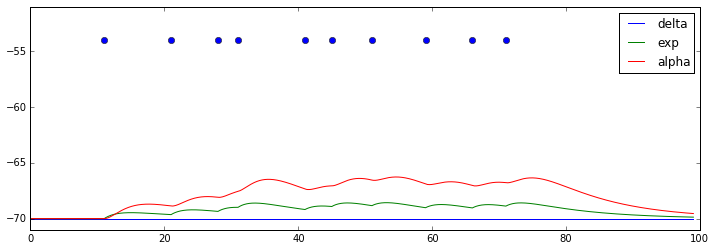

In [41]:
task_3_2(ts, 15., 100., 100.)


    Delta: 10 spikes [ 11.  21.  28.  31.  41.  45.  51.  59.  66.  71.]
    Exp  : 5 spikes [ 23.1  31.5  45.3  59.8  71.4]
    Alpha: 7 spikes [ 23.   31.4  42.9  48.4  55.1  64.1  71.5]
    


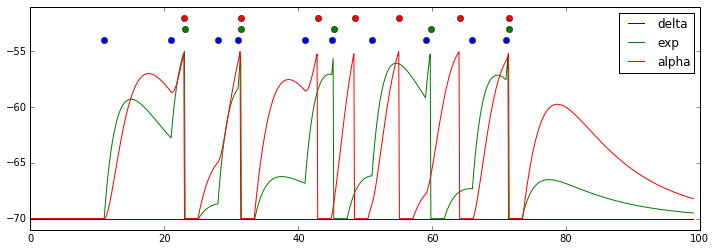

In [42]:
task_3_2(ts, 15., 2000., 1000.)


    Delta: 10 spikes [ 11.  21.  28.  31.  41.  45.  51.  59.  66.  71.]
    Exp  : 10 spikes [ 12.5  22.   28.9  32.   41.9  45.9  51.8  59.8  66.8  71.8]
    Alpha: 13 spikes [ 13.7  22.5  28.7  32.2  36.4  43.1  46.7  51.7  56.2  61.2  67.2  71.8
  76.3]
    


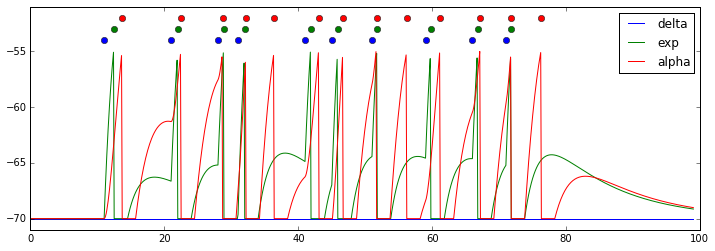

In [43]:
task_3_2(ts, wd=15., we=4000., wa=2000.)


    Delta: 10 spikes [ 11.  21.  28.  31.  41.  45.  51.  59.  66.  71.]
    Exp  : 10 spikes [ 12.5  22.   28.9  32.   41.9  45.9  51.8  59.8  66.8  71.8]
    Alpha: 10 spikes [ 14.6  23.6  30.1  33.9  42.9  47.1  52.6  60.4  67.4  72.5]
    


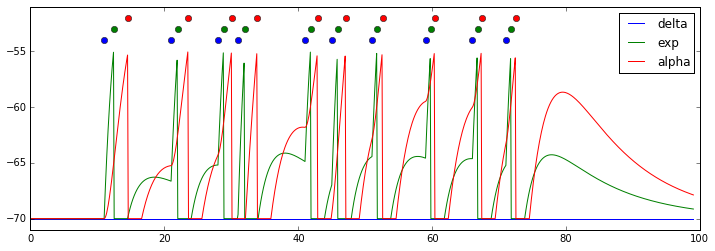

In [44]:
task_3_2(ts, 15., 4000., 1500.)

### Challenge


    Delta: 10 spikes [ 14.6  24.6  31.6  34.6  44.6  48.6  54.6  62.6  69.6  74.6]
    Exp  : 10 spikes [ 14.6  24.1  31.   34.1  44.   48.   53.9  61.9  68.9  73.9]
    Alpha: 10 spikes [ 14.6  23.6  30.1  33.9  42.9  47.1  52.6  60.4  67.4  72.5]
    


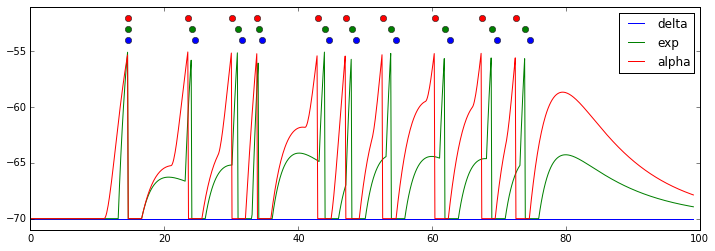

In [45]:
task_3_2(ts, 15., 4000., 1500., 4.6, 3.1, 1.)


    Delta: 10 spikes [ 12.6  22.6  29.6  32.6  42.6  46.6  52.6  60.6  67.6  72.6]
    Exp  : 10 spikes [ 13.6  23.1  30.   33.1  43.   47.   52.9  60.9  67.9  72.9]
    Alpha: 10 spikes [ 14.6  23.6  30.1  33.9  42.9  47.1  52.6  60.4  67.4  72.5]
    


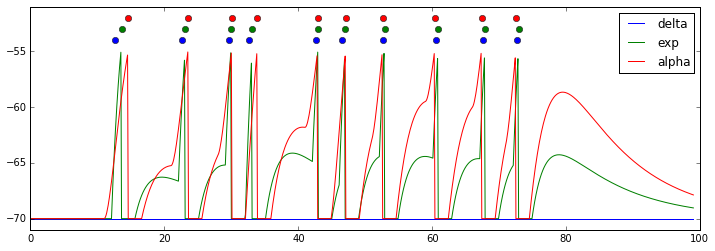

In [46]:
task_3_2(ts, 15., 4000., 1500., 2.6, 2.1, 1.)


    Delta: 10 spikes [ 12.6  22.6  29.6  32.6  42.6  46.6  52.6  60.6  67.6  72.6]
    Exp  : 10 spikes [ 13.6  23.1  30.   33.1  43.   47.   52.9  60.9  67.9  72.9]
    Alpha: 10 spikes [ 14.4  23.3  29.8  33.4  42.5  46.8  52.2  59.9  66.8  72. ]
    


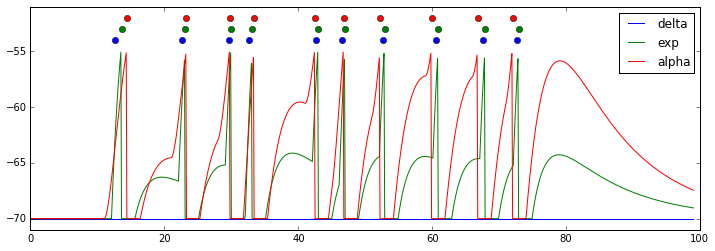

In [47]:
task_3_2(ts, 15., 4000., 1600., 2.6, 2.1, 1.)


    Delta: 10 spikes [ 12.6  22.6  29.6  32.6  42.6  46.6  52.6  60.6  67.6  72.6]
    Exp  : 10 spikes [ 13.6  23.1  30.   33.1  43.   47.   52.9  60.9  67.9  72.9]
    Alpha: 10 spikes [ 15.   23.9  30.4  34.4  43.4  47.6  53.1  60.9  67.9  73. ]
    


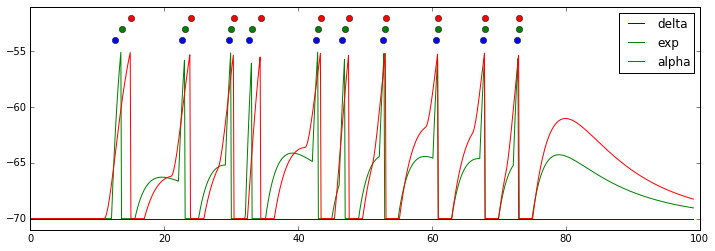

In [48]:
task_3_2(ts, 15., 4000., 1400., 2.6, 2.1, 1.)


    Delta: 10 spikes [ 12.6  22.6  29.6  32.6  42.6  46.6  52.6  60.6  67.6  72.6]
    Exp  : 10 spikes [ 13.6  23.1  30.   33.1  43.   47.   52.9  60.9  67.9  72.9]
    Alpha: 10 spikes [ 14.3  23.2  29.7  33.3  42.4  46.7  52.1  59.8  66.7  71.9]
    


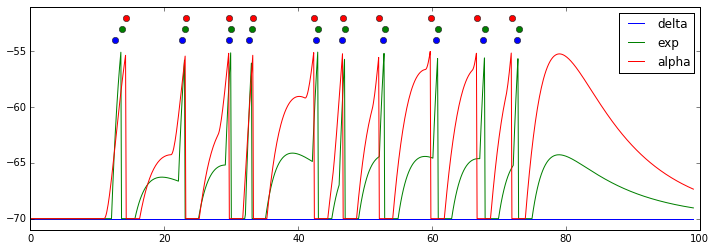

In [49]:
task_3_2(ts, 15., 4000., 1620., 2.6, 2.1, 1.)


    Delta: 10 spikes [ 11.  21.  28.  31.  41.  45.  51.  59.  66.  71.]
    Exp  : 10 spikes [ 12.5  22.   28.9  32.   41.9  45.9  51.8  59.8  66.8  71.8]
    Alpha: 10 spikes [ 14.3  23.2  29.7  33.3  42.4  46.7  52.1  59.8  66.7  71.9]
    


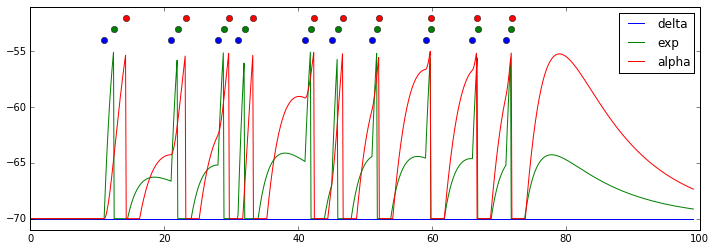

In [50]:
task_3_2(ts, 15., 4000., 1620., 1., 1., 1.)

## Task 4

In [51]:
def build_network4(rE, rI, wEd, wEe, wEa, wId, wIe, wIa):
    nest.ResetKernel()

    d = nest.Create('iaf_psc_delta')
    e = nest.Create('iaf_psc_exp')
    a = nest.Create('iaf_psc_alpha')
    nrns = d + e + a
    
    pgE = nest.Create('poisson_generator', params={'rate': rE})
    pgI = nest.Create('poisson_generator', params={'rate': rI})

    pnE = nest.Create('parrot_neuron')
    pnI = nest.Create('parrot_neuron')
    
    nest.Connect(pgE, pnE)
    nest.Connect(pgI, pnI)

    nest.Connect(pnE, d, syn_spec={'weight': wEd})
    nest.Connect(pnI, d, syn_spec={'weight': wId})
    nest.Connect(pnE, e, syn_spec={'weight': wEe})
    nest.Connect(pnI, e, syn_spec={'weight': wIe})
    nest.Connect(pnE, a, syn_spec={'weight': wEa})
    nest.Connect(pnI, a, syn_spec={'weight': wIa})
    
    vms = nest.Create('voltmeter', n=3, params={'interval': 0.1})
    sds = nest.Create('spike_detector', n=3)
    
    nest.Connect(vms, nrns, 'one_to_one')
    nest.Connect(nrns, sds, 'one_to_one')

    return vms, sds

In [52]:
def task_4_rate(tsim, rE, rI, wEd, wEe, wEa, wId, wIe, wIa):
    
    _, sds = build_network4(rE, rI, wEd, wEe, wEa, wId, wIe, wIa)
    nest.Simulate(tsim)

    rates = [nsp / tsim * 1000 for nsp in nest.GetStatus(sds, 'n_events')]
    print """
    Delta: {} 1/s
    Exp  : {} 1/s
    Alpha: {} 1/s
    """.format(rates[0], rates[1], rates[2])

### Exploration 1

In [53]:
task_4_rate(1000., 1000., 0., 100., 200., 200., 0., 0., 0.)


    Delta: 334.0 1/s
    Exp  : 34.0 1/s
    Alpha: 146.0 1/s
    


In [54]:
task_4_rate(1000., 1000., 0., 50., 400., 180., 0., 0., 0.)


    Delta: 334.0 1/s
    Exp  : 105.0 1/s
    Alpha: 133.0 1/s
    


In [55]:
task_4_rate(1000., 1000., 0., 10., 390., 150., 0., 0., 0.)


    Delta: 245.0 1/s
    Exp  : 104.0 1/s
    Alpha: 109.0 1/s
    


In [56]:
task_4_rate(1000., 1000., 0., 5., 350., 120., 0., 0., 0.)


    Delta: 164.0 1/s
    Exp  : 92.0 1/s
    Alpha: 83.0 1/s
    


In [57]:
task_4_rate(1000., 1000., 0., 2., 370., 140., 0., 0., 0.)


    Delta: 64.0 1/s
    Exp  : 96.0 1/s
    Alpha: 101.0 1/s
    


In [58]:
task_4_rate(1000., 1000., 0., 3., 380., 140., 0., 0., 0.)


    Delta: 105.0 1/s
    Exp  : 100.0 1/s
    Alpha: 101.0 1/s
    


In [59]:
task_4_rate(10000., 1000., 0., 2.8, 380., 135., 0., 0., 0.)


    Delta: 103.5 1/s
    Exp  : 105.0 1/s
    Alpha: 102.4 1/s
    


In [60]:
task_4_rate(10000., 1000., 0., 2.6, 375., 130., 0., 0., 0.)


    Delta: 94.8 1/s
    Exp  : 103.5 1/s
    Alpha: 98.4 1/s
    


In [61]:
task_4_rate(10000., 1000., 0., 2.7, 370., 132., 0., 0., 0.)


    Delta: 99.0 1/s
    Exp  : 102.1 1/s
    Alpha: 100.0 1/s
    


### Exploration 2

In [62]:
task_4_rate(10000., 1000., 1000., 2.7, 370., 132., -1., -100., -50.)


    Delta: 59.4 1/s
    Exp  : 65.4 1/s
    Alpha: 47.0 1/s
    


In [63]:
task_4_rate(10000., 1000., 1000., 2.7, 370., 132., -2., -200., -60.)


    Delta: 26.1 1/s
    Exp  : 33.7 1/s
    Alpha: 38.2 1/s
    


In [64]:
task_4_rate(10000., 1000., 1000., 2.7, 370., 132., -1.8, -210., -65.)


    Delta: 30.3 1/s
    Exp  : 31.3 1/s
    Alpha: 33.7 1/s
    


In [65]:
task_4_rate(10000., 1000., 1000., 2.7, 370., 132., -1.8, -220., -70.)


    Delta: 30.3 1/s
    Exp  : 28.3 1/s
    Alpha: 30.0 1/s
    


In [66]:
task_4_rate(10000., 1000., 1000., 2.7, 370., 132., -1.8, -215., -70.)


    Delta: 30.3 1/s
    Exp  : 29.7 1/s
    Alpha: 30.0 1/s
    


### Exploration 3


Delta: 4 spikes [  19.1   40.9   83.9  176.7]
Exp  : 4 spikes [  20.1   42.4   84.7  177.6]
Alpha: 4 spikes [  21.3   44.1   86.5  179.3]



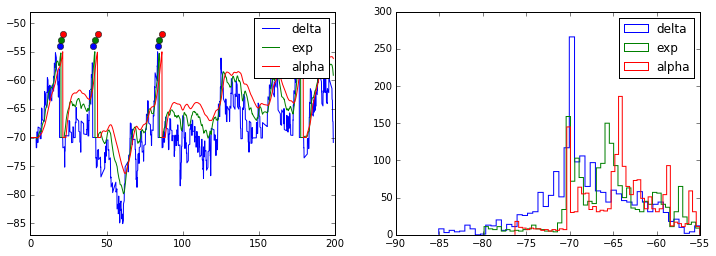

In [67]:
vms, sds = build_network4(1000., 1000., 2.7, 370., 132., -1.8, -215., -70.)
nest.Simulate(200)

vm_stat = nest.GetStatus(vms, 'events')
t_Vm = vm_stat[0]['times']
Vm_delta, Vm_exp, Vm_alpha = vm_stat[0]['V_m'], vm_stat[1]['V_m'], vm_stat[2]['V_m']
sd_stat = nest.GetStatus(sds, 'events')
sp_delta, sp_exp, sp_alpha = sd_stat[0]['times'], sd_stat[1]['times'], sd_stat[2]['times']

print """
Delta: {} spikes {}
Exp  : {} spikes {}
Alpha: {} spikes {}
""".format(len(sp_delta), sp_delta, len(sp_exp), sp_exp, len(sp_alpha), sp_alpha)

plt.subplot(121)
plt.plot(t_Vm, Vm_delta, label='delta')
plt.plot(t_Vm, Vm_exp, label='exp')
plt.plot(t_Vm, Vm_alpha, label='alpha')
plt.plot(sp_delta, -54 * np.ones_like(sp_delta), 'bo')
plt.plot(sp_exp, -53 * np.ones_like(sp_exp), 'go')
plt.plot(sp_alpha, -52 * np.ones_like(sp_alpha), 'ro')
plt.ylim(-87, -48)
plt.legend();

plt.subplot(122)
plt.hist(Vm_delta, bins=50, histtype='step', label='delta')
plt.hist(Vm_exp, bins=50, histtype='step', label='exp')
plt.hist(Vm_alpha, bins=50, histtype='step', label='alpha')
plt.legend();

### Exploration 4

In [68]:
r_in = np.logspace(2, 5, num=25)
r_d = np.nan * np.ones_like(r_in)
r_e = np.nan * np.ones_like(r_in)
r_a = np.nan * np.ones_like(r_in)

t_sim = 10000.

for idx, r in enumerate(r_in):
    _, sds = build_network4(r, r, 2.7, 370., 132., -1.8, -215., -70.)
    nest.Simulate(t_sim)

    n_d, n_e, n_a = nest.GetStatus(sds, 'n_events')
    r_d[idx] = n_d / t_sim * 1000.
    r_e[idx] = n_e / t_sim * 1000.
    r_a[idx] = n_a / t_sim * 1000.

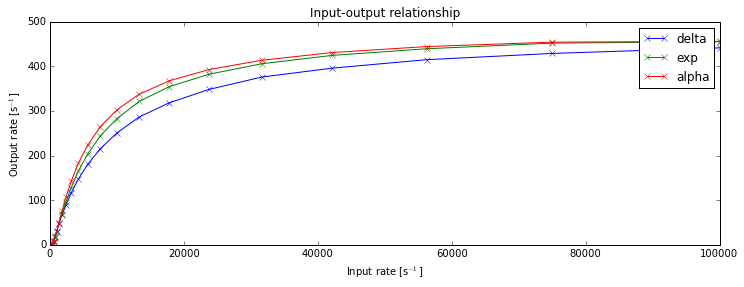

In [69]:
plt.plot(r_in, r_d, 'x-', label='delta')
plt.plot(r_in, r_e, 'x-', label='exp')
plt.plot(r_in, r_a, 'x-', label='alpha')
plt.xlabel('Input rate [s$^{-1}$]')
plt.ylabel('Output rate [s$^{-1}$]')
plt.legend()
plt.title('Input-output relationship');